<a href="https://colab.research.google.com/github/siyosmith/ML-tasks/blob/main/Heart_disease_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [44]:
df=pd.read_csv("/content/drive/MyDrive/Heart_Disease_Prediction.csv")
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [45]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [47]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [48]:
df.shape

(270, 14)

In [49]:
df['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

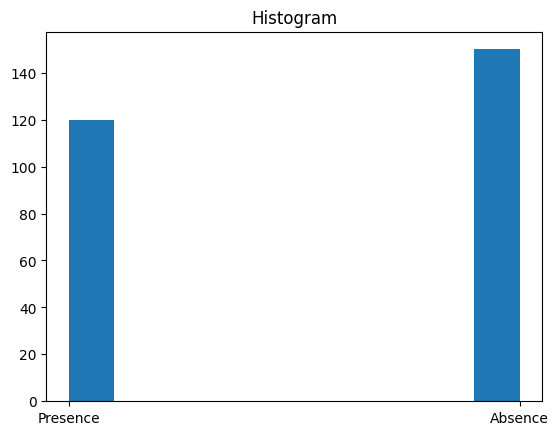

In [50]:
plt.hist(df['Heart Disease'])
plt.title("Histogram")
plt.show()

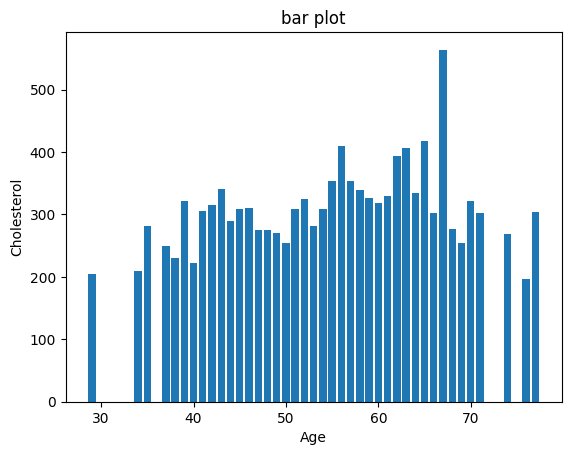

In [51]:
plt.bar(df['Age'],df['Cholesterol'])
plt.title("bar plot")
plt.xlabel('Age')
plt.ylabel('Cholesterol')

plt.show()

Text(0.5, 1.0, 'Age vs BP')

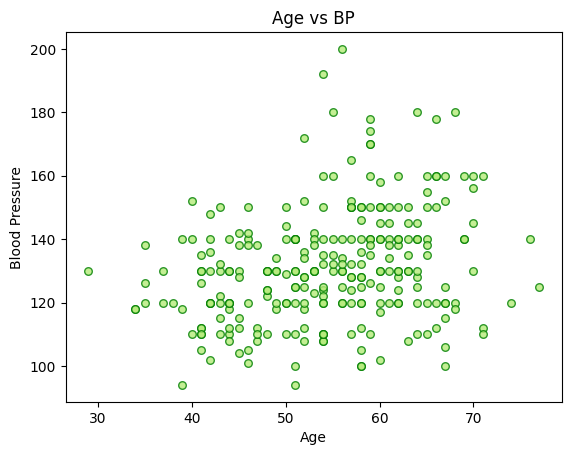

In [52]:

plt.scatter(df['Age'],df['BP'], s=30, c = '#b6eb7a', edgecolor = 'green', linewidth = 1, alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Age vs BP')

In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Heart Disease']=le.fit_transform(df['Heart Disease'])
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [54]:
#x = df['Heart Disease']
#x
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
data_scaled= sc.fit_transform(df)

In [55]:
#y=df.drop(['Heart Disease'],axis=1)
#y
data_scaled= pd.DataFrame(data_scaled)
data_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.854167,1.0,1.000000,0.339623,0.447489,0.0,1.0,0.290076,0.0,0.387097,0.5,1.000000,0.00,1.0
1,0.791667,0.0,0.666667,0.198113,1.000000,0.0,1.0,0.679389,0.0,0.258065,0.5,0.000000,1.00,0.0
2,0.583333,1.0,0.333333,0.283019,0.308219,0.0,0.0,0.534351,0.0,0.048387,0.0,0.000000,1.00,1.0
3,0.729167,1.0,1.000000,0.320755,0.312785,0.0,0.0,0.259542,1.0,0.032258,0.5,0.333333,1.00,0.0
4,0.937500,0.0,0.333333,0.245283,0.326484,0.0,1.0,0.381679,1.0,0.032258,0.0,0.333333,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.479167,1.0,0.666667,0.735849,0.166667,1.0,0.0,0.694656,0.0,0.080645,0.0,0.000000,1.00,0.0
266,0.312500,1.0,0.333333,0.245283,0.312785,0.0,0.0,0.778626,0.0,0.000000,0.0,0.000000,1.00,0.0
267,0.562500,0.0,0.333333,0.433962,0.383562,0.0,1.0,0.625954,0.0,0.209677,0.5,0.000000,0.00,0.0
268,0.583333,1.0,1.000000,0.433962,0.150685,0.0,0.0,0.587786,0.0,0.064516,0.5,0.000000,0.75,0.0


In [56]:
x = data_scaled.iloc[:, [0,1,2,3,4,8,9,10,11,12]].values
y = data_scaled.iloc[:, [13]].values

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

## **Logistic** **Regression**

In [58]:
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [59]:
y_pred= model.predict(x_test)

In [60]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test,y_pred)
accuracy

0.8382352941176471

In [61]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[37,  3],
       [ 8, 20]])

## **Random** **Forest**

In [62]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=200,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

<ipython-input-62-8e3a8d31c722>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [63]:
y_pred=classifier.predict(x_test)

In [64]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8235294117647058

In [65]:
cm= confusion_matrix(y_test,y_pred)
cm

array([[37,  3],
       [ 9, 19]])

## **KNN**

In [66]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [67]:
y_preed=classifier.predict(x_test)

In [68]:
accuracy=accuracy_score(y_test,y_preed)
accuracy

0.8382352941176471

In [69]:
m= confusion_matrix(y_test, y_preed)
m

array([[34,  6],
       [ 5, 23]])

## **SVM**

In [70]:
from sklearn.svm import SVC
model=SVC(kernel='linear',random_state=0)
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=0)

In [71]:
y_predd=model.predict(x_test)

In [72]:
acc=accuracy_score(y_predd,y_test)
acc

0.8529411764705882

## **Decision** **tree**

In [73]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
model_deci=DecisionTreeClassifier(criterion='entropy',random_state=42)
model_deci.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [74]:
y_prred=model_deci.predict(x_test)

In [75]:
accuracy_score(y_test,y_prred)

0.8088235294117647

In [76]:
f=confusion_matrix(y_prred,y_test)
f

array([[37, 10],
       [ 3, 18]])

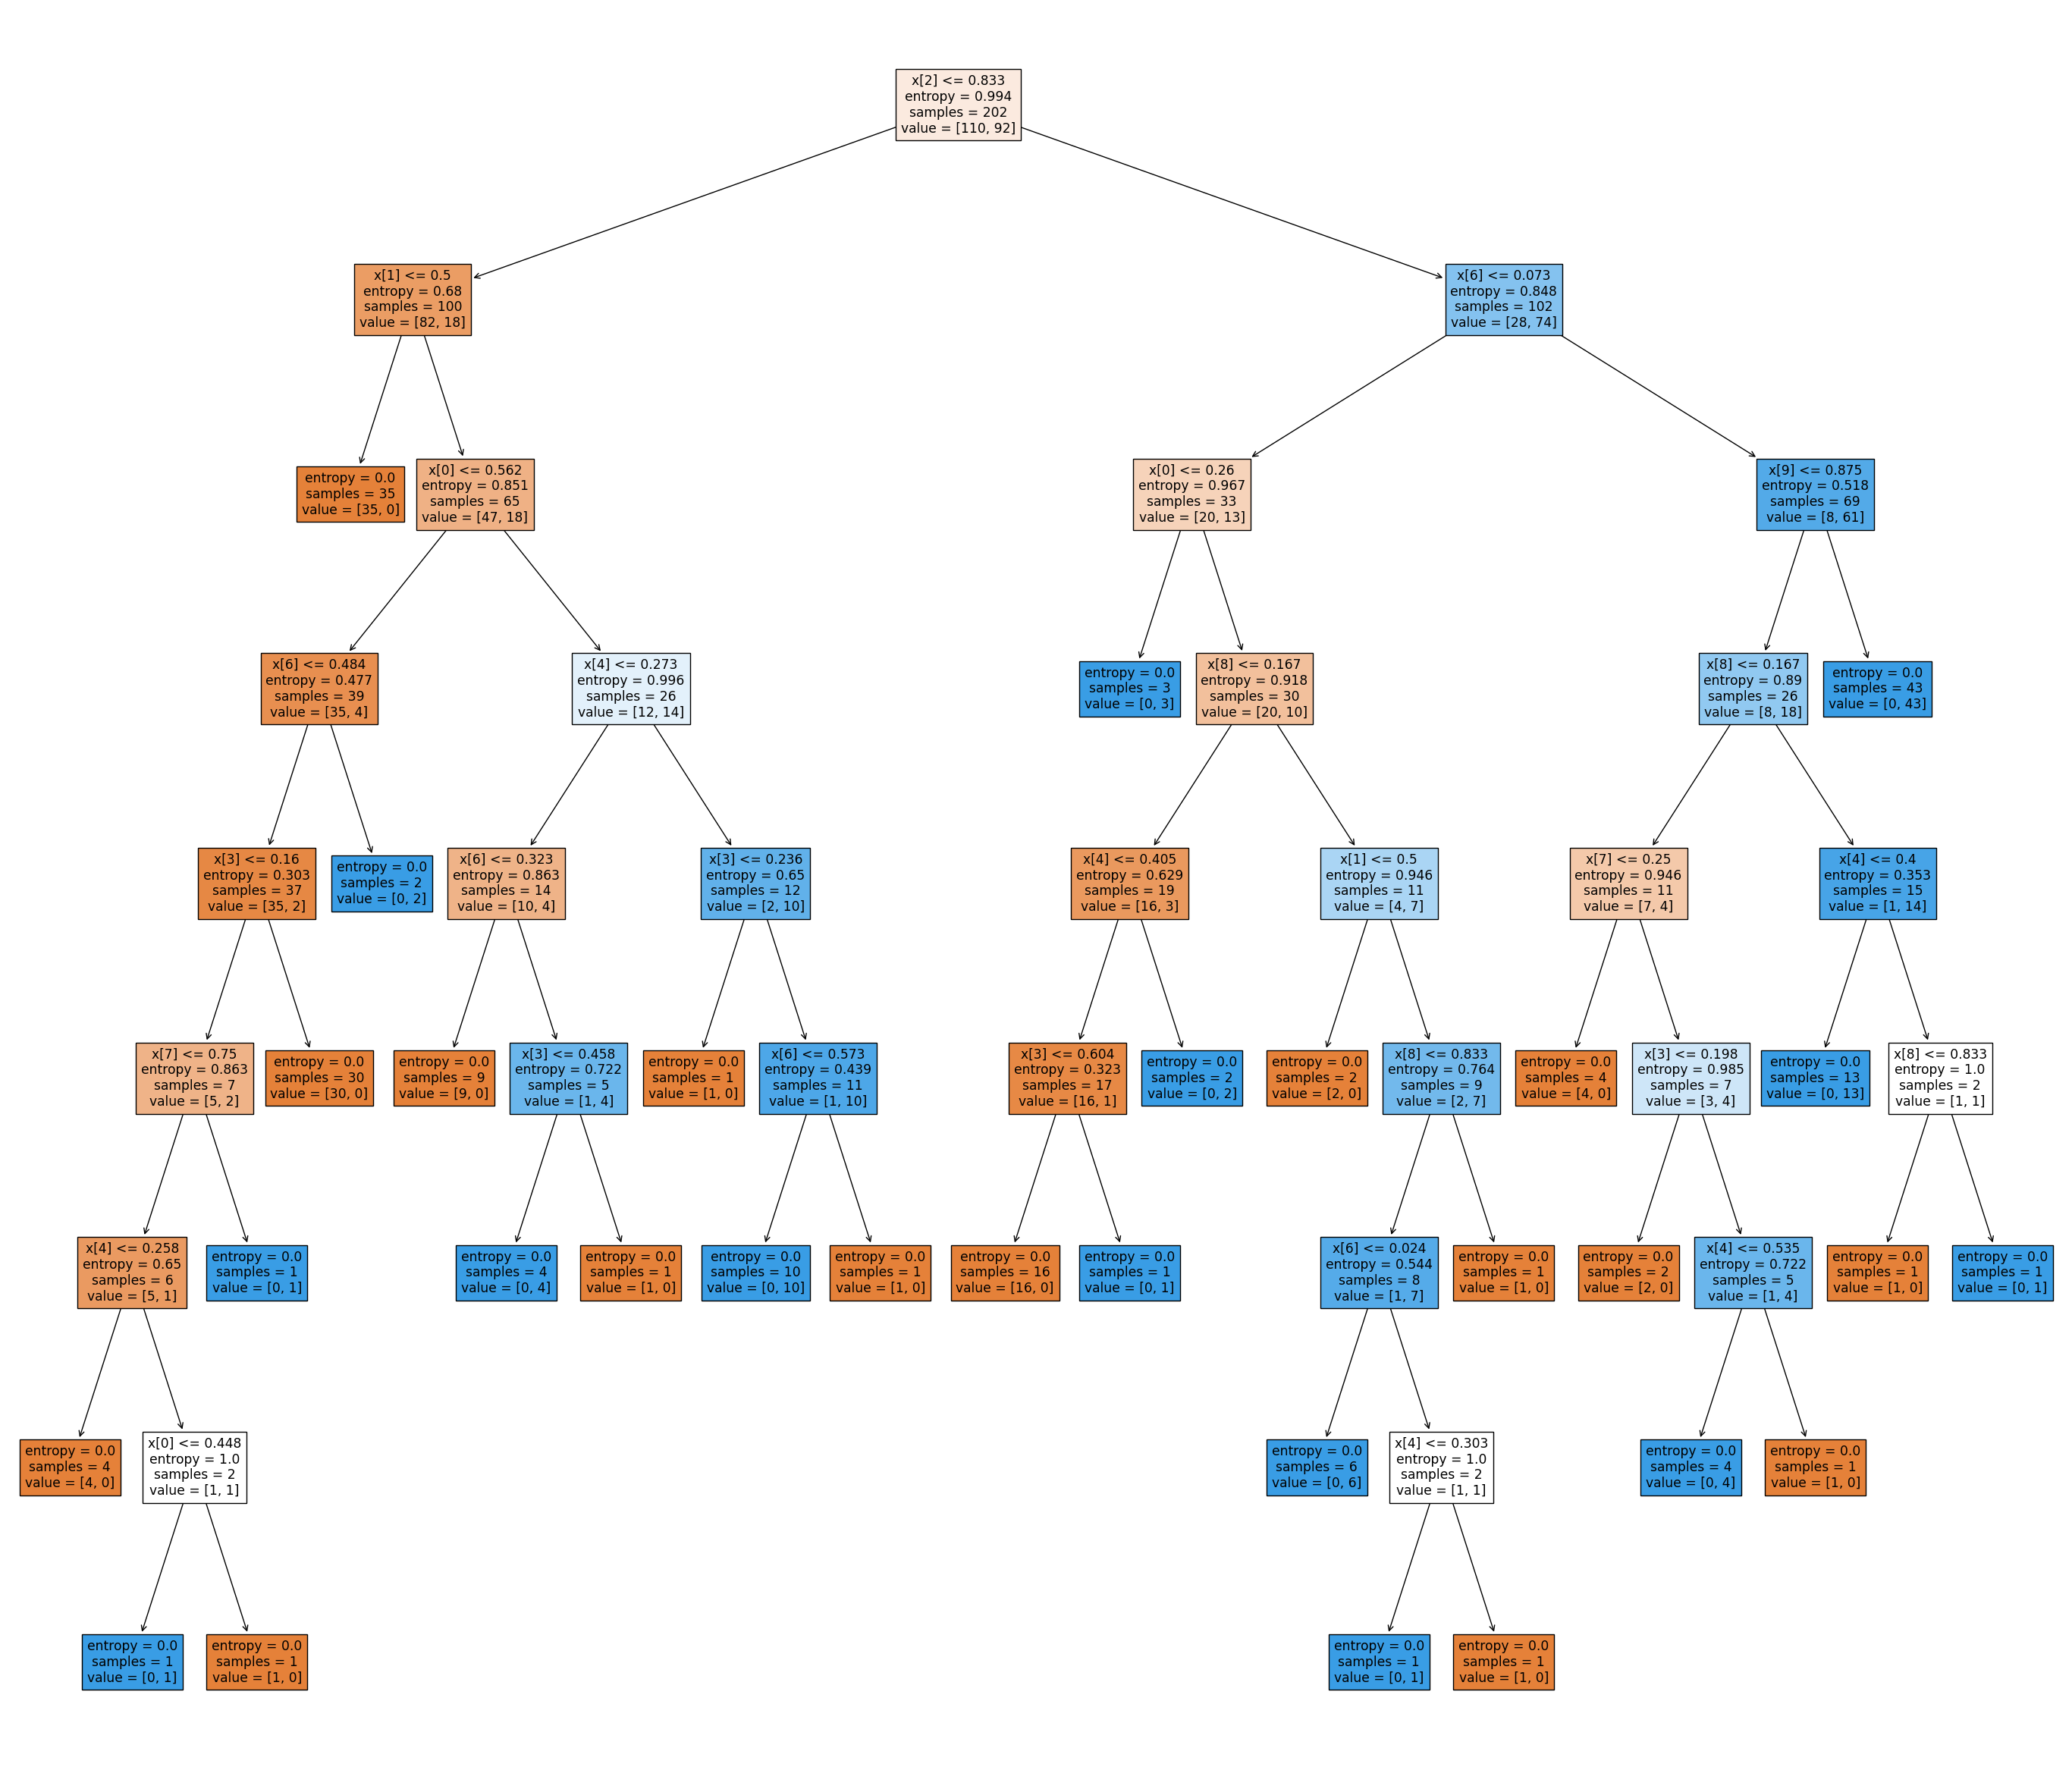

In [77]:
plt.figure(figsize=(35,30))
plot_tree(model_deci,filled=True)
plt.show()

## **Naive** **Bayes**

In [79]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)


y_pred1 = gnb.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
accuracy_score(y_test,y_pred1)

0.8529411764705882

In [ ]:
age = float(input("Enter age: "))
sex= float(input("Enter sex: "))
Chest_pain_type = float(input("chest: "))
BP= float(input("bp: "))
cholestrol = float(input("cholestrol: "))
FBS=float(input("FBS: "))
EKG=float(input("EKG: "))
HR=float(input("HR: "))
Exercise_angina = float(input("exercise angina: "))
ST_depression = float(input("dipression: "))
Slope_of_ST = float(input("slope of st: "))
Number_of_vessels_fluro = float(input("no. of vessels: "))
Thallium= float(input("Enter thallium : "))
input_data = [[age,sex,Chest_pain_type,BP,cholestrol,Exercise_angina,ST_depression,Slope_of_ST,Number_of_vessels_fluro,Thallium]]
input_data
model.predict(input_data)


CONCLUSION OF HEART DISEASE PREDICTION


THE ACCURACY SCORE WE GOT USING LOGISTIC REGRESSION IS - 83.82%

THE ACCURACY SCORE WE GOT USING DECISION TREE IS - 80.88%

THE ACCURACY SCORE WE GOT USING RANDOM FOREST TREE IS - 82.35%

THE ACCURACY SCORE WE GOT USING KNN IS - 83.82%

THE ACCURACY SCORE WE GOT USING SVM IS - 85.29%

THE ACCURACY SCORE WE GOT USING Naive bayes IS - 85.29%

HERE SVM AND NAIVE BAYES  GIVES MORE ACCURACY

